In [1]:
#!pip install folium
#!pip install powerbiclient
#%pip install powerbiclient

In [2]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication
import os
import folium
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [3]:
df = pd.read_csv("datos_limpiados.csv")

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace("\n", " ", regex=False)

dfgz = pd.read_csv("datos_limpiados.csv")
dfgz_selected = dfgz[['id', 'bathrooms', 'amenities', 'bedrooms', 'beds', "accommodates", "first_review", "review_scores_rating"]]

df_merged = pd.merge(df, dfgz_selected, on='id', how='left')

In [4]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Eliminar los valores NaN de la columna antes de generar el histograma y aplicar la prueba de normalidad
    clean_column = df[column].dropna()

    #  Applying Shappire test
    stat, p = shapiro(clean_column)
    print(f'Estadístico={stat}, p-value={p}')
    
    if p < 0.05:
        print(f"We refuse that H0 from {column} is  a normal distribution")
    else:
        print(f"We dont refuse that H0 from variable {column} is a normal distribution")


#no graficar, solo indicar variables siguen h0

Estadístico=0.8105661973132359, p-value=9.752055885493289e-66
We refuse that H0 from id is  a normal distribution
Estadístico=0.8288704511294727, p-value=9.409570094303033e-64
We refuse that H0 from host_id is  a normal distribution
Estadístico=0.9108422332816091, p-value=9.192436777600945e-52
We refuse that H0 from latitude is  a normal distribution
Estadístico=0.9616740705498454, p-value=3.801609386887275e-38
We refuse that H0 from longitude is  a normal distribution
Estadístico=0.8878703166243317, p-value=7.839893487215293e-56
We refuse that H0 from price is  a normal distribution
Estadístico=0.11606815377305701, p-value=1.204980349324504e-99
We refuse that H0 from minimum_nights is  a normal distribution
Estadístico=0.4219139276367042, p-value=1.4006516281302314e-89
We refuse that H0 from number_of_reviews is  a normal distribution
Estadístico=0.7312963332295352, p-value=8.392440379604294e-73
We refuse that H0 from reviews_per_month is  a normal distribution
Estadístico=0.159222726

c:\Users\Ral\Desktop\Project_Oslo\Env_Oslo\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6417.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Ral\AppData\Local\Temp\ipykernel_12852\2203905419.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(clean_column)
c:\Users\Ral\Desktop\Project_Oslo\Env_Oslo\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6414.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Ral\Desktop\Project_Oslo\Env_Oslo\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6413.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Ral\Deskto

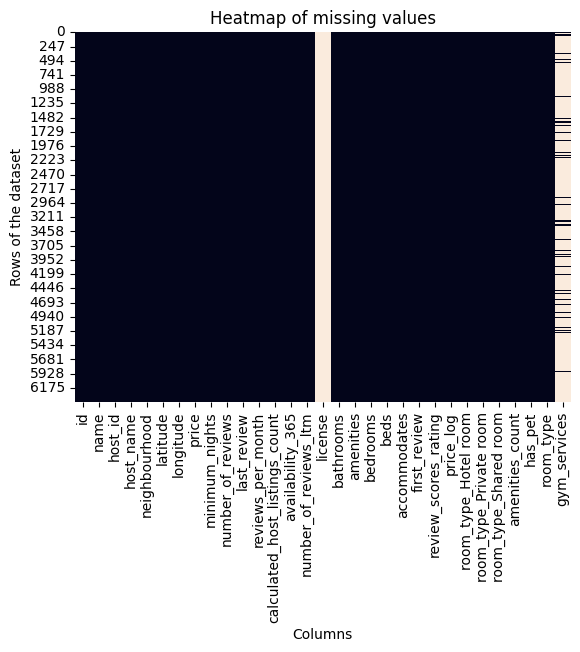

In [5]:
sns.heatmap(df.isnull(), cbar=False)
plt.xlabel("Columns")
plt.ylabel("Rows of the dataset")
plt.title("Heatmap of missing values")
plt.show()

Check price

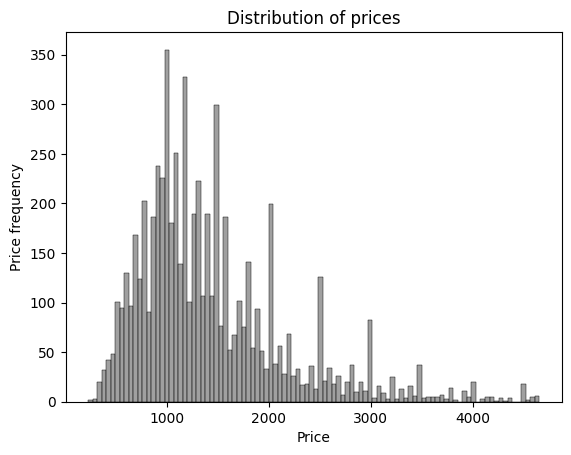

In [6]:
sns.histplot(data=df["price"], bins=100, color="Grey")
df[["price"]].describe().T
plt.xlabel("Price")
plt.ylabel("Price frequency")
plt.title("Distribution of prices")
plt.show()
# titulo, precio(€), explicar ejes, y ajustar outliers 

Left-skewed histogram

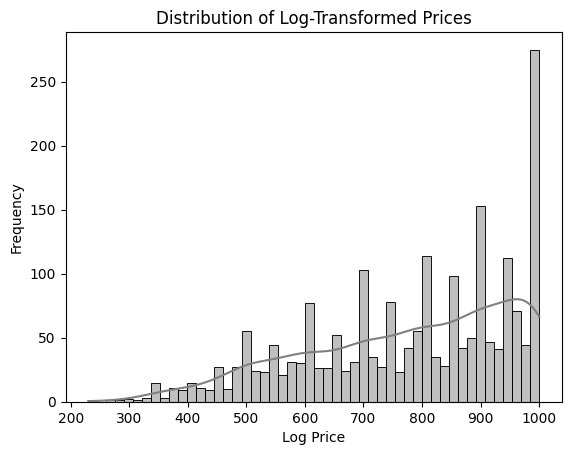

In [7]:
#sns.histplot(data = price_under_1000_KNN["price"], bins=100, kde=True)
# Apply log transformation
#price_under_1000_KNN = price_under_1000_KNN.assign(log_price=np.log1p(price_under_1000_KNN['price']))

# Create the histogram
sns.histplot(data=df[df['price'] <= 1000]["price"], bins=50, color= "grey", kde=True) 
plt.xlabel("Log Price")
plt.ylabel("Frequency")
#plt.xscale("log")
#plt.yscale("log")
plt.title("Distribution of Log-Transformed Prices")
plt.show()
# Se puede aplicar el logaritmo directamente con plt, eliminar log.

Text(0, 0.5, 'Frecuency')

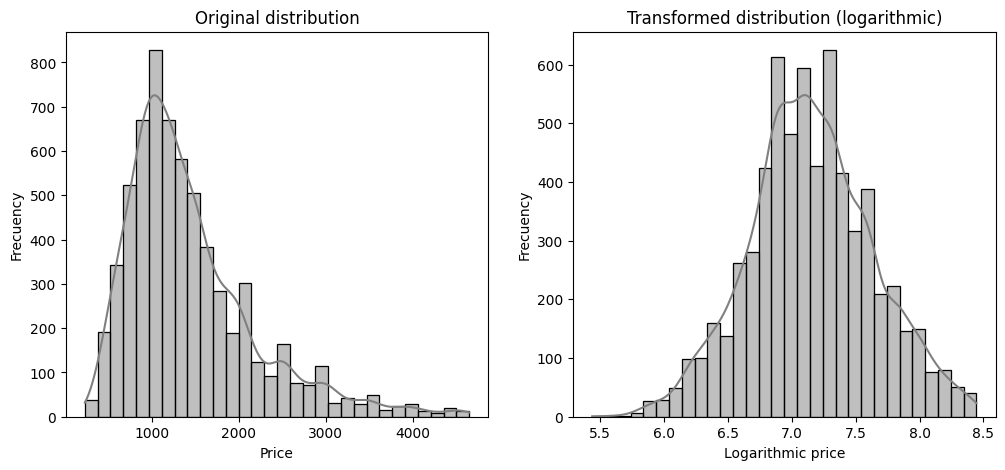

In [8]:
# copy df
df_with_log = df.copy()

# Apply log transformation to the 'price' column
df_with_log["log_price"] = np.log1p(df_with_log["price"])  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram of original price distribution
sns.histplot(data=df["price"], bins=30, color= "grey", kde=True, ax=axes[0]) 
axes[0].set_title("Original distribution") 
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frecuency")

# Plot histogram of logarithmic transformed price distribution
sns.histplot(data=df_with_log['log_price'], bins=30, color = "grey", kde=True, ax=axes[1]) 
axes[1].set_title("Transformed distribution (logarithmic)") 
axes[1].set_xlabel("Logarithmic price")
axes[1].set_ylabel("Frecuency")
# no utilizar "vanilla"

In [9]:
# Path to CSV and GeoJSON files
df = pd.read_csv(r'C:\Users\Ral\Desktop\Project_Oslo\listings.csv')
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace("\n", " ", regex=False)
geojson_path = os.path.join(base_path, 'neighbourhoods.geojson')

# Verify that the necessary columns exist in the DataFrame
if not {'latitude', 'longitude', 'price'}.issubset(df.columns):
    raise ValueError("Document must have columns 'latitude', 'longitude' and 'price'.")

# Take random sample and drop missing values
sample_df = df.sample(min(len(df), 1000), random_state=42).dropna(subset=['price'])

# Average longitude and latitatude to center map
map_center = [sample_df["latitude"].mean(), sample_df["longitude"].mean()]

# Create map with coordinates and zoom level
m = folium.Map(location=map_center, zoom_start=11)

# min-max bars for price 
max_price = sample_df['price'].max()
min_price = sample_df['price'].min()

# Function to relate colour to price
def get_color(price):
    norm = (price - min_price) / (max_price - min_price) if max_price != min_price else 0.5
    red = int(255 * (1 - norm))
    green = int(255 * norm)
    return f'#{red:02x}{green:02x}00'

# looping in each row of df sample for marking the map
for _, row in sample_df.iterrows():
   # popup texts with each wanted column
    popup_text = f"Latitude: {row['latitude']}<br>Longitude: {row['longitude']}<br>Price: {row['price']}"
    # Circlemarker with location, color and popup
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=get_color(row['price']),
        fill=True,
        fill_color=get_color(row['price']),
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, parse_html=True)
    ).add_to(m)
# Check Geojson files
if os.path.exists(geojson_path):
    try:
        regions = gpd.read_file(geojson_path)
       # Geojson regions as overlay map
        folium.GeoJson(regions, name="Neighbourhoods").add_to(m)
    except Exception as e:
        print(f"Error GeoJSON: {e}")
else:
    print(f"Doesn't exist: {geojson_path} ")
# overlay control button 
folium.LayerControl().add_to(m)
# html file (streamlit)
m.save("interactive_map.html")

m

NameError: name 'base_path' is not defined

In [2]:
print(df[["latitude", "longitude", "price"]].describe())

NameError: name 'df' is not defined

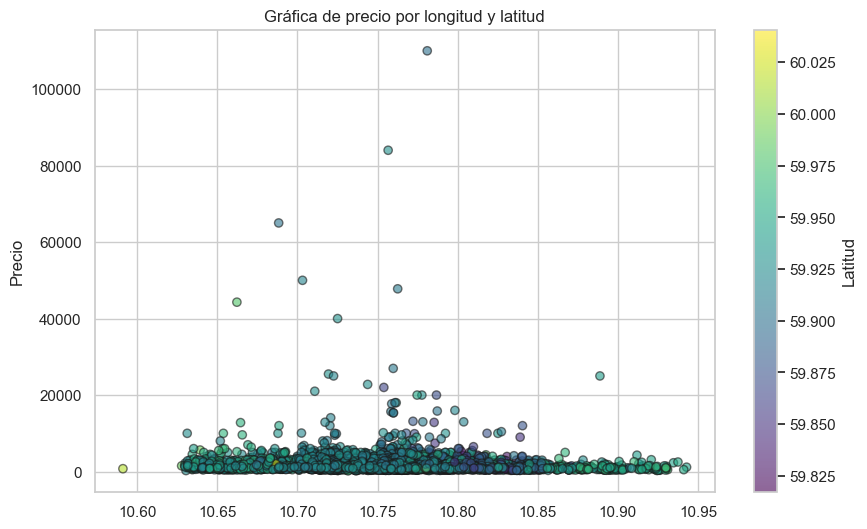

In [67]:
# Verify that the necessary columns exist in the Df
required_columns = {'latitude', 'longitude', 'price'}
if not required_columns.issubset(df.columns):
    raise ValueError("The DataFrame is missing one or more of the required columns: 'latitude', 'longitude', 'price'.")

#save
df_recovered = df.copy()

# Drop rows with missing vlaues 
df = df.dropna(subset=["longitude", "price", "latitude"])


sns.set_theme(style="whitegrid")

# Create a scatter plot: Longitude vs. Price, colored by Latitude
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_recovered["longitude"], df_recovered["price"], c=df_recovered["latitude"], cmap="viridis", alpha=0.6, edgecolor='k')
plt.colorbar(scatter, label="Latitud")
plt.ylabel("Precio")
plt.title("Gráfica de precio por longitud y latitud")
plt.show()


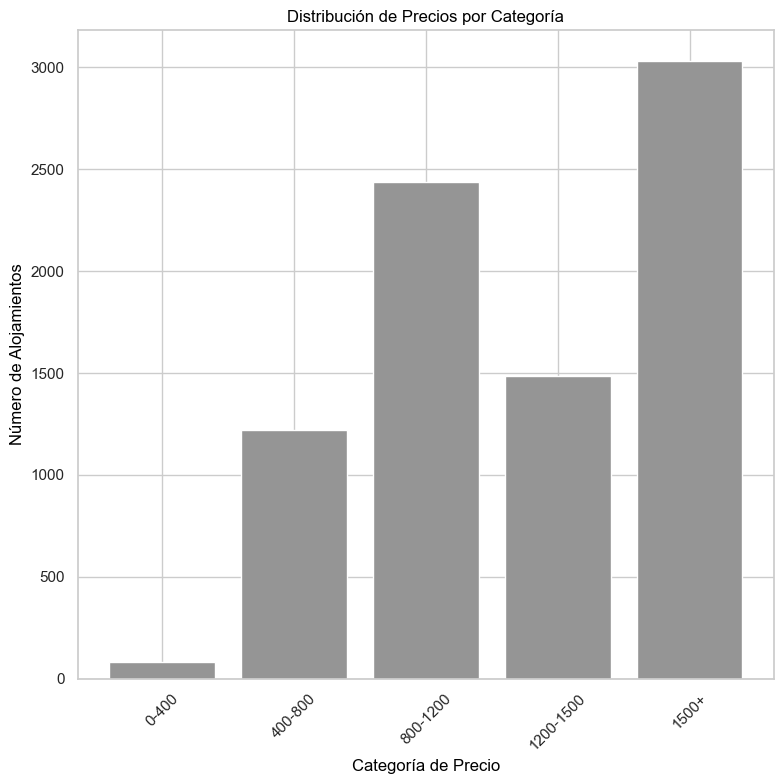

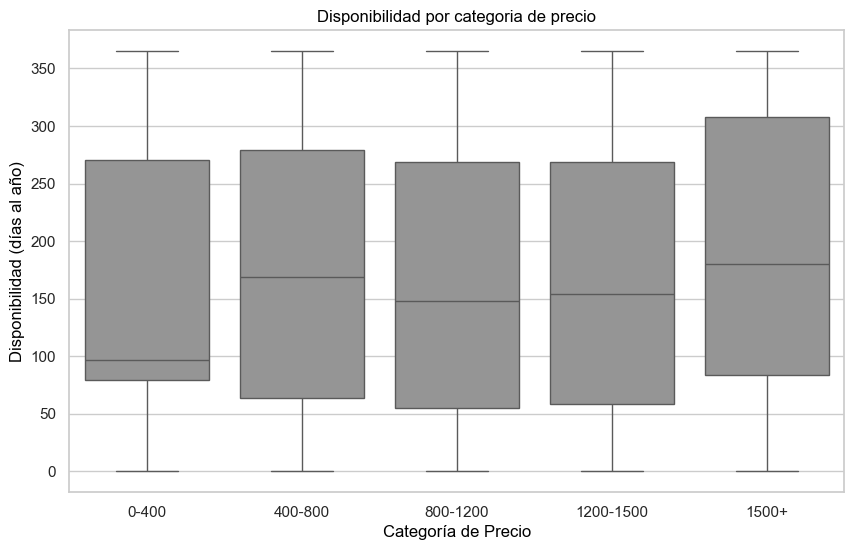

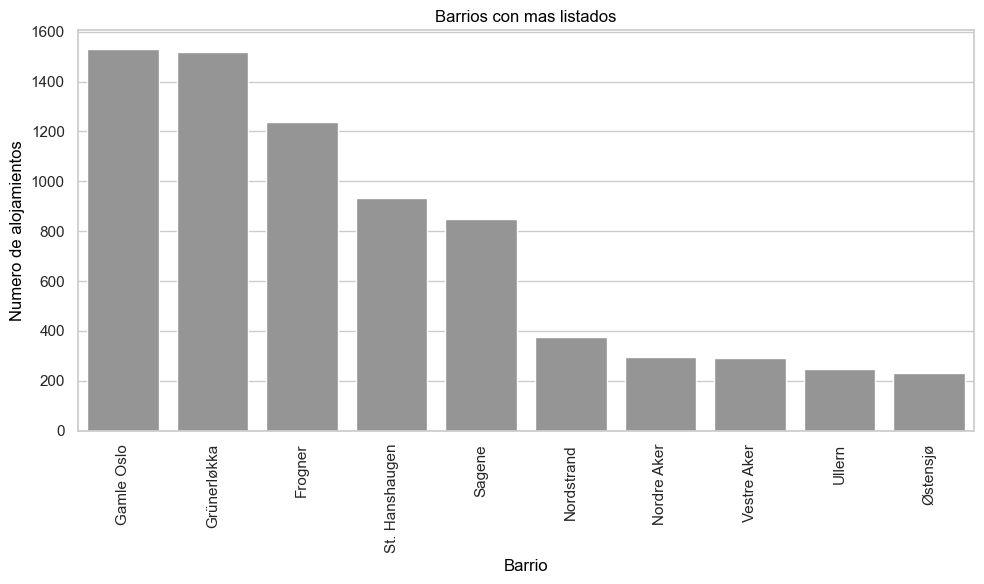

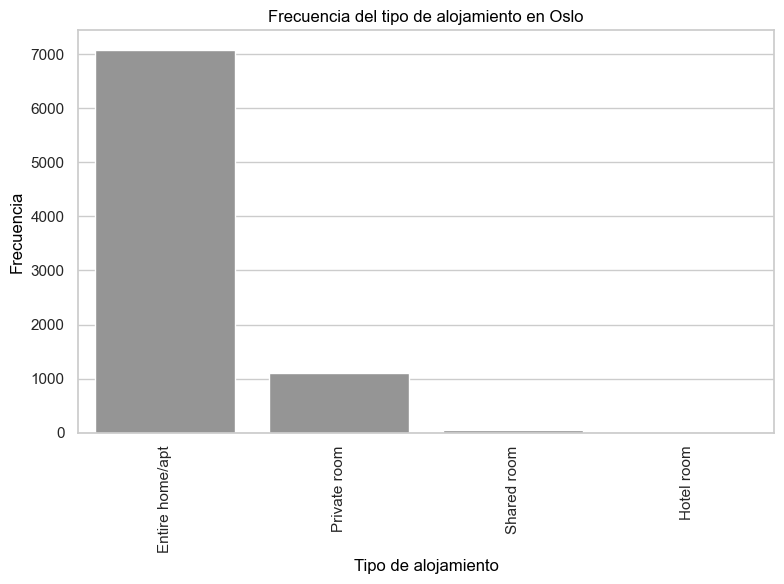

In [69]:
# Verify
required_columns = ["price", "availability_365", "neighbourhood", "room_type"]
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing required columns: {[col for col in required_columns if col not in df.columns]}")

# Defining brackets
bins = [0, 400, 800, 1200, 1500, np.inf]
labels = ["0-400", "400-800", "800-1200", "1200-1500", "1500+"]
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels)


# Graphic 1:
price_counts = df['price_category'].value_counts().sort_index()
plt.figure(figsize=(8,8))
paleta_gris = sns.color_palette("Greys", n_colors=1)
plt.bar(price_counts.index, price_counts.values, color=paleta_gris[0])
plt.xlabel('Categoría de Precio', color='black')
plt.ylabel('Número de Alojamientos', color='black')
plt.title('Distribución de Precios por Categoría', color='black')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejorar la legibilidad
plt.tight_layout()  # Ajusta el layout para evitar que las etiquetas se corten
plt.show()

# Graphic 2:
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette("Greys", n_colors=1))
sns.boxplot(x="price_category", y="availability_365", data=df, order=labels)
plt.xlabel("Categoría de Precio", color="black")
plt.ylabel("Disponibilidad (días al año)", color="black")
plt.title("Disponibilidad por categoria de precio", color="black")
plt.show()

# Graphic 3:
neighbourhood_counts = df["neighbourhood"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette("Greys", n_colors=1))  
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values)
plt.xlabel("Barrio", color= "Black")
plt.ylabel("Numero de alojamientos", color="black")
plt.title("Barrios con mas listados", color="black")
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

# Graphic 4:
room_type_counts = df["room_type"].value_counts()
plt.figure(figsize=(8,6))
sns.set_palette(sns.color_palette("Greys", n_colors=1))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel("Tipo de alojamiento", color="black")
plt.ylabel("Frecuencia", color="black")
plt.title("Frecuencia del tipo de alojamiento en Oslo", color="black")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()



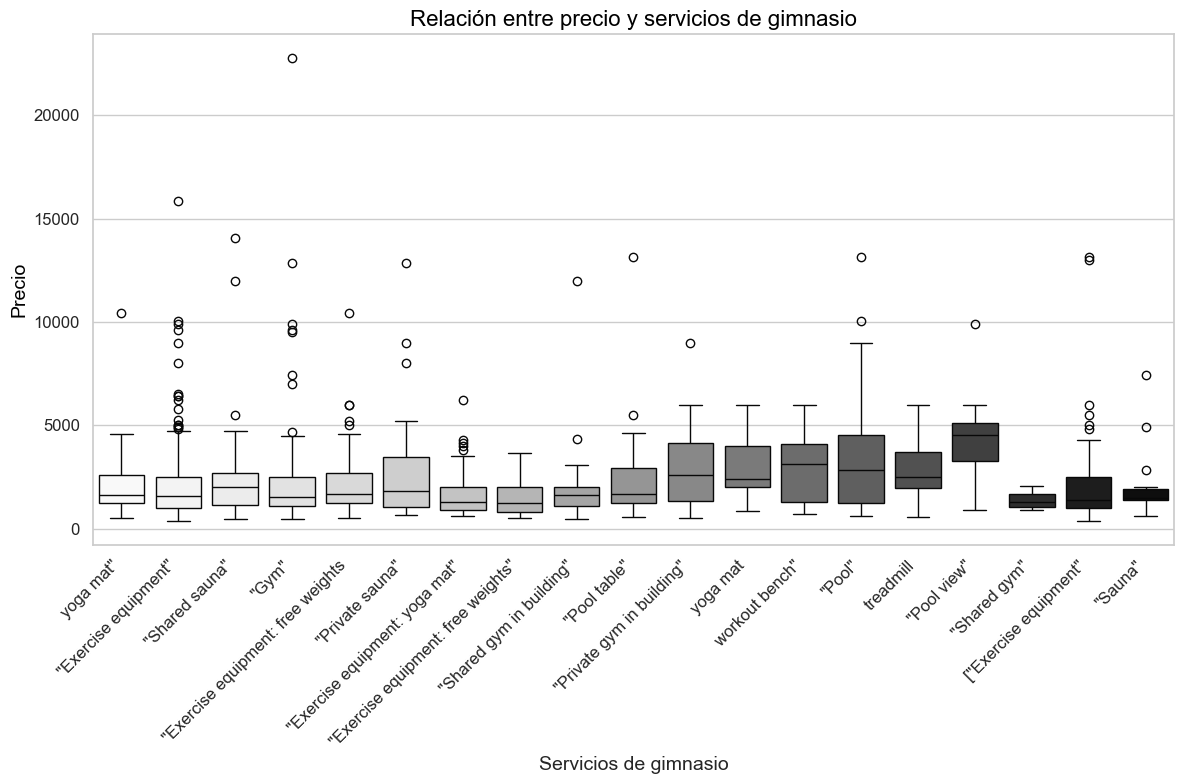

In [73]:
dfgz_selected = dfgz[['id', 'bathrooms', 'amenities', 'bedrooms', 'beds', "accommodates", "first_review", "review_scores_rating"]]

df_merged = pd.merge(df, dfgz_selected, on='id', how='left')

df_merged['gym_services'] = df_merged['amenities'].apply(lambda x: ', '.join(
    [amenity.strip() for amenity in x.split(',') 
     if any(word in amenity.lower() for word in ["yoga","exercise", "gym", "equipment", "treadmill", "workout", "pool", "sauna"]) 
     and not any(exclude in amenity.lower() for exclude in ["paid", "nearby", "oven", "refrigerator", "stove"])]
))

gym_services_exploded = df_merged['gym_services'].str.split(',').explode().str.strip()

gym_services_exploded = gym_services_exploded[gym_services_exploded != '']

df_exploded = pd.DataFrame({
    'gym_service': gym_services_exploded,
    'price': df_merged['price'].loc[gym_services_exploded.index].values
})

# Mostrar solo los servicios más comunes
service_counts = df_exploded["gym_service"].value_counts()
services_to_keep = service_counts[service_counts > 10].index
df_exploded = df_exploded[df_exploded["gym_service"].isin(services_to_keep)]

plt.figure(figsize=(12,8))
sns.set_style("whitegrid")

df_exploded = df_exploded.reset_index(drop=True)
sns.boxplot(x="gym_service", y="price", hue="gym_service", data=df_exploded, palette="Greys", dodge=False)
plt.xlabel("Servicios de gimnasio", fontsize=14)
plt.ylabel("Precio", color="black", fontsize=14)
plt.title('Relación entre precio y servicios de gimnasio', color="black", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


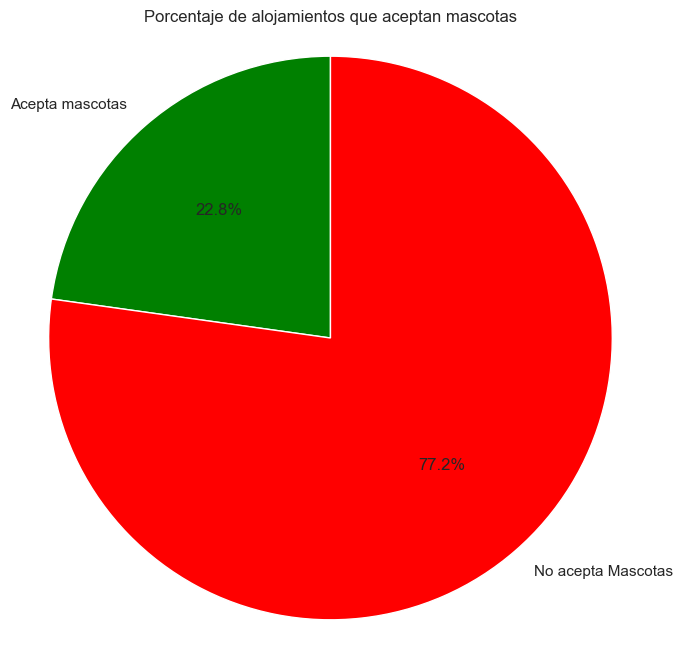

In [74]:
def check_pet(row):
    return "pet" in row["amenities"].lower() or "pets" in row["amenities"].lower()

df_merged["has_pet"] = df_merged.apply(lambda row: check_pet(row), axis=1)

accepts_pets = df_merged["has_pet"].sum()
does_not_accept_pets = len(df_merged) - accepts_pets


plt.figure(figsize=(8,8))
plt.pie([accepts_pets, does_not_accept_pets], labels=["Acepta mascotas", 
"No acepta Mascotas"], colors=["green", "red"], autopct='%1.1f%%', startangle=90)
plt.title("Porcentaje de alojamientos que aceptan mascotas")
plt.axis("equal") 
plt.show()
